# Task

For the SIMULATE/ESTIMATE/INFER stuff: Please make a simple Python interface for these 3 capabilities --- as a separate generator_emulator.py interface file --- using the abstract base class module in Python, with method-level documentation. Include a constructor that takes a type specification as input (a dict mapping variable names to type specs, where a type spec is either "numerical", "numerical with a range", or "closed-set categorical with a specific # of outcomes).

Demonstrate it works by providing 4 implementations, + the test cases that show it's working:

- a Naive Bayes implementation in pure Python (that enforces numerical range constraints as a post-processing/rejection step)
- a Bayesian naive Bayes implementation in Venture (that uses separate programs to model each column)
- a heuristic mixture-model based method that fits the mixture by using k means clustering (mapping discrete values to numbers, or using your favorite hybrid discrete/continuous distance metric), choosing k via crossvalidation-based model selection

For INFER, do something simple and heuristic for continuous values: fit a mixture of a very-broad-variance Gaussian and a narrow variance Gaussian (heuristically if you want, or via a Bayesian fit in Venture), and test if the weight on the narrow-variance component is above the given confidence threshold.

Provide test cases that show, graphically, that the two naive Bayes implementations work on a couple of representative type signatures (when the true generator is realizable given those hypothesis classes), and another test that shows that if the true generator is realizable under the mixture but not naive bayes (i.e. it has a couple components), the mixture works better given enough data.

### Questions

- No structure learning here?

- How does Naive Bayes work in this scenario?

 Naive Bayes is one of the models implemented in BayesDB, using different conjugate models for each data type.
    1. Dirichlet multinomial model for categorical data
    2. Normal-Inverse-Gamma model for numerical data
    3. Normal-Inverse-Gamma model with rejection step for constrained numerical data
    
- How to implement it in pure Python?    
    
- How would the Bayesian Naive Bayes work?

- What is a type signature, i.e., what does it mean for the true generator to be realizable? 

#### Build on BayesDB workflow, and create an interface for
1. Import data table (.csv)
2. Pick appropriate data types (typeSpec dict)
3. Build model (NaiveBayes, BayesNB, MixtureModel)
4. Execute queries (ESTIMATE, INFER, SIMULATE)

In [21]:
from abc import ABCMeta, abstractmethod
import pandas as pd
# from venture.shortcuts import *

class BayesDataset(object):
    """Abstract Base Class for Simulate/Estimate/Infer functionalities"""
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def __init__ (self, dataframe, typeSpec):

        self.typeSpec = typeSpec
        """typeSpec is a dict mapping variable names to type specs."""
        
        self.dataset = dataframe
        """dataframe is a pandas dataframe."""
            
    @abstractmethod
    def Simulate(self, y, queries):
        """ 
        Generates samples for variable y from the conditional predictive 
        distribution, conditioned queries.
        """
        pass
    
    @abstractmethod
    def Estimate(self):
        """ Estimates the probability that each pair of variables in the dataset are dependent."""
        """ Returns a symmetric off-diagonal matrix with dependence probabilities"""
        pass
    
    @abstractmethod
    def Infer(self, sigma, estimator):
        """Fills in missing values of the database with a point estimate over its predictive distribution """
        """INPUT: estimator- estimator to be used (such as mean, or mode) (object(?))
                     sigma - confidence threshold, under which the missing value is not filled. """
        pass

In [ ]:
class NaiveBDS(BayesDataset):
    """a Naive Bayes implementation in pure Python 
    (that enforces numerical range constraints as a post-processing/rejection step"""
    
    def __init__ (self, dataset, typeSpec):
        super(NaiveBDS,self).__init__(dataset,typeSpec)
        
    def Simulate(self, y, queries):
        pass
    
    def Estimate(self):
        pass
    
    def Infer(self, sigma, estimator):
        pass        

In [ ]:
class BayesNaiveBDS(BayesDataset):
    """a Bayesian naive Bayes implementation in Venture 
    (that uses separate programs to model each column)"""
    pass

In [22]:
class MixtureBDS(BayesDataset):
    """a heuristic mixture-model based method that fits the mixture by using k means clustering
    (mapping discrete values to numbers, or using your favorite hybrid discrete/continuous distance metric),
    choosing k via crossvalidation-based model selection"""
    pass

## Playground

### Dataset Generators

In [200]:
# Generate a categorical dataset with k independent columns, each with j_k categories 
#  and n rows

import numpy as np


n = 1000
k = 2 #start with one variable
j = 1+ np.random.poisson(5, size=k) # with a small number of categories

def iid_categorical(n, k, j=False):
    ''' Generate count vector sampled from multinomial distribution. '''
    ''' n - Total number of counts 
        k - Number of variables (columns)
        j - Number of categories per variable (array of size k)
    '''
    if not(j):
        j = 1+ np.random.poisson(5, size=k)
    counts=[]
    for i in np.arange(0,j.size):
        a = np.tile(.1,j[i])
        p = np.random.dirichlet(alpha= a) # probabilities for each category
        counts.append(np.random.multinomial(n,p)) # counts
    return counts




[array([ 43,   1, 388, 355, 213]),
 array([ 68,  36,   0,   0,   1, 868,   0,   0,  27])]

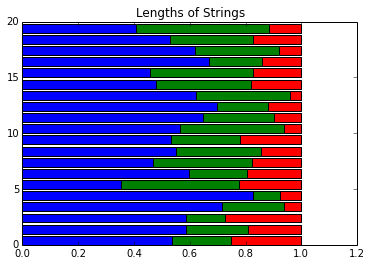

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt

s = np.random.dirichlet((10, 5, 3), 20).transpose()
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings")

### A little Venture

In [ ]:
import venture.shortcuts as s
v = s.Lite().make_church_prime_ripl()
v.execute_program("""
[assume get_component_hyperparameter (mem (lambda (col) (gamma 1.0 1.0)) )]
[assume get_component_model (mem (lambda (col) (make_sym_dir_mult (get_component_hyperparameter col) num_values) ) )]
[assume get_cell (mem (lambda (row col) (get_component_model col) )) ]
""")

### A little Pandas

In [65]:
import pandas as pd
satellite = pd.read_excel('Data/satellite.xlsx')
satellite.describe()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),NORAD Number,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 62,Unnamed: 63
count,1288.000000,1304.000000,1304.000000,1303.000000,1298.000000,1305.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean,5.498284,14994.111963,17137.860429,0.023381,50.100532,33602.277395,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,54.579193,16628.467848,22606.824399,0.120181,43.786547,5971.422458,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-177.120000,177.000000,285.000000,0.000000,0.000000,7530.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,643.000000,704.750000,0.000210,0.080000,27683.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,1412.500000,1453.500000,0.000486,54.900000,35943.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,35772.250000,35795.000000,0.001537,97.470000,39191.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,328.500000,62200.000000,330000.000000,0.957119,516.000000,40882.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# satellite.dtypes % get types of each column

Suppose there is a satellite in geosynchronous orbit. What is its probable purposes?

In [100]:
df = satellite[['Country of Operator/Owner', 'Country of Contractor', 'Contractor', 'Longitude of GEO (degrees)']] # correlated cluster
df

,Country of Operator/Owner,Country of Contractor,Contractor,Longitude of GEO (degrees)
0,Denmark,Denmark,Aalborg University,0.00
1,Multinational,USA,Lockheed Martin Astro Space,116.54
2,Multinational,USA,Space Systems/Loral,75.00
3,Multinational,USA,Space Systems/Loral,146.06
4,Multinational,NaN,Boeing Satellite Systems,-3.00
5,Multinational,USA,Space Systems/Loral,75.00
6,Multinational,USA,Lockheed Martin,159.00
7,Multinational,USA,Lockheed Martin Astro Space,116.18
8,USA,USA,TRW Space and Electronics,-14.50
9,USA,USA,TRW Space and Electronics,95.40
